# **Group 5**

**Project Title :**Prediction Model for Obesity Level Prediction Using Classifiers Algorithm Machine Learning.

**Members :**

1.   Hazmi Izamuddin Bin Abu Bakar
2.   Nur Hafizzah Binti Mohd Yusop
3.   Noor Ezzatul Syamimi Binti Nordin















# **1. Dataset Description**

**DATASET DESCRIPTION**

This dataset include data for obesity levels of individuals from the countries of Mexico, Peru and Colombia, based on their eating habits, lifetstyle, genetic and physical condition. This dataset was extracted from Kaggle dataset and updated on 1 August 2019.

The data contains 17 attributes and 2,111 instances, the records are labeled with the class variable Obesity Level, that allows classification of the data using the values of Insufficient Weight (Underweight), Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Data Details:

1. **Gender:** Gender
2. **Age:** Age
3. **Height :** in metres
4. **Weight :** in kgs
5. **family_history :** Has a family member suffered or suffers from overweight?
6. **FAVC :** Do you eat high caloric food frequently?
7. **FCVC :** Do you usually eat vegetables in your meals?
8. **NCP :** How many main meals do you have daily?
9. **CAEC :** Do you eat any food between meals?
10. **SMOKE :** Do you smoke?
11. **CH2O :** How much water do you drink daily?
12. **SCC :** Do you monitor the calories you eat daily?
13. **FAF:** How often do you have physical activity?
14. **TUE :** How much time do you use technological devices such as cell phone, videogames, television, computer and others?
15. **CALC :** How often do you drink alcohol?
16. **MTRANS :** Which transportation do you usually use?
17. **Obesity_level :** Obesity level

**Target Label:**

The target label is **Obesity Level** where it is have 7 classification


# **2. Objective**

**OBJECTIVE**

To classify the data according to obesity level using Machine Learning algorithm. For this data, we pick Random Forest,Logistic regression, Support Vector Machine & K-Nearest Neighbour as a classifier algorithm.

**WORKFLOW**

# **3. Dataset Preprocessing & Visualization**

## 3.1 Import necessary library

In [1]:
import pandas as pd # statistical analysis and data manipulation
import numpy as np # mathematical functions and numerical array
from matplotlib import pyplot # to plot graph for visualization
import matplotlib.pyplot as plt # to plot graph for visualization
import seaborn as sns # to plot graph for visualization
from scipy import stats #hypothesis testing
from sklearn.preprocessing import LabelEncoder #to lebal categorical atrributes
from sklearn.model_selection import train_test_split, cross_val_score #split train & test data, & increase robustness of evaluation by multiple splits
from sklearn.preprocessing import StandardScaler #to scale numerical features to make it easier to read by ML
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation matrix
from sklearn.ensemble import RandomForestClassifier #ensemble method classification task ML algorithm
from sklearn.linear_model import LogisticRegression #classification task ML algorithm
from sklearn.neighbors import KNeighborsClassifier #classification task ML algorithm
from sklearn.svm import SVC #classification task ML algorithm
from sklearn.model_selection import GridSearchCV #hyperparameter tuning

## 3.2 Import the dataset

In [2]:
df = pd.read_csv('/content/Obesity prediction.csv')
data = df.copy()

## 3.3 Data Exploration

In [3]:
df.shape # it has 2111 rows & 17 columns

(2111, 17)

In [4]:
# Display the first few rows of the dataset
df.head()

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [5]:
#display number of variance in each attributes
df.nunique()

Gender               2
Age               1402
Height            1574
Weight            1525
family_history       2
FAVC                 2
FCVC               810
NCP                635
CAEC                 4
SMOKE                2
CH2O              1268
SCC                  2
FAF               1190
TUE               1129
CALC                 4
MTRANS               5
Obesity              7
dtype: int64

In [6]:
 # Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [7]:
# Check for missing values
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [8]:
#Understanding the Target Variable (Obesity Level)
class_counts = df['Obesity'].value_counts()
print("Target Variable Distribution:")
class_counts

Target Variable Distribution:


Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

<ipython-input-9-eefdcdb6dce6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Obesity", data=df, palette='Set2')
<ipython-input-9-eefdcdb6dce6>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


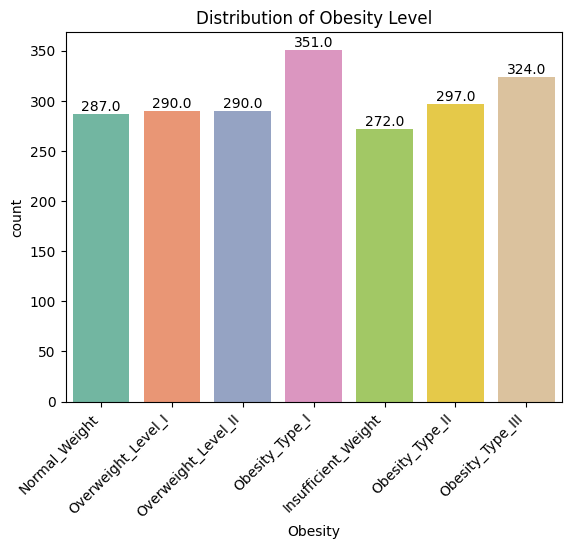

In [9]:
# Creating a count plot using Seaborn to visualize the distribution of target variable - Obesity Level
ax = sns.countplot(x="Obesity", data=df, palette='Set2')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adding a title to the plot
plt.title('Distribution of Obesity Level')

# Adding labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Displaying the plot
plt.show()


We can see that from the  the disribution, the data is sufficient and contained well-balanced to build ideal machine learning model.

## 3.4 Data Processing & Visualization

In [10]:
# Count numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")


Number of numerical columns: 8
Number of categorical columns: 9


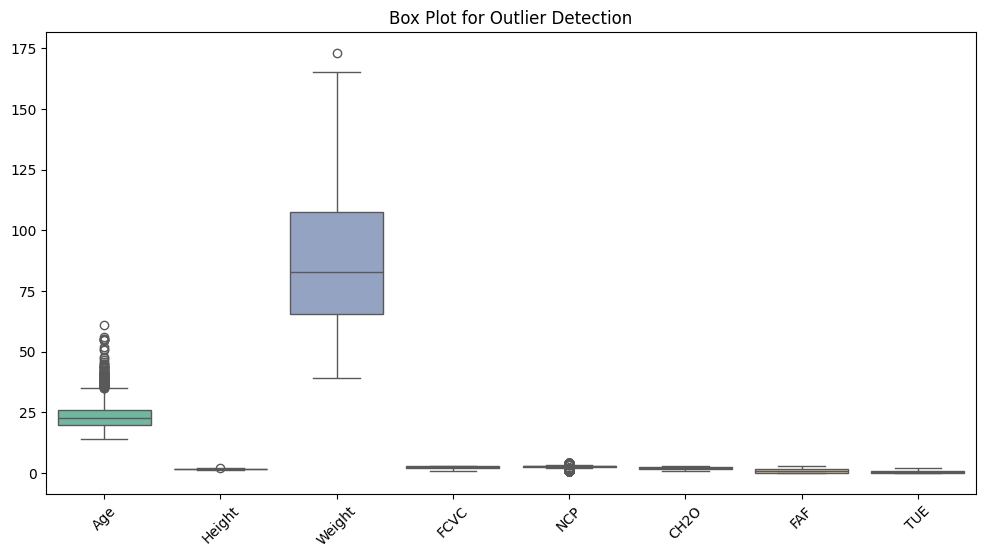

In [11]:
# Boxplot to visualize outliers
# Select numerical columns excluding 'id'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


# Create a single figure with subplots
plt.figure(figsize=(12, 6))  # Adjust figure size

# Create a box plot for all numerical attributes except 'id'
sns.boxplot(data=data[numerical_columns], palette='Set2')

# Set title and labels
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

From the Boxplot above, we observe several outliers in the "Age" feature. However, we have decided to keep these outliers instead of removing them. This is because different age groups have varying risks of obesity, and we want to include this diversity in our dataset when building the model. Keeping these variations helps create a more comprehensive and accurate machine learning model.

In [12]:
# Select only object (categorical) columns , want to know details of value for categorical
object_columns = data.select_dtypes(include=['object'])

# Count the number of unique values for each object column
unique_counts = object_columns.nunique()

print("Number of unique values for each object column:")
print(unique_counts)


Number of unique values for each object column:
Gender            2
family_history    2
FAVC              2
CAEC              4
SMOKE             2
SCC               2
CALC              4
MTRANS            5
Obesity           7
dtype: int64


In [13]:
# Select only object (categorical) columns
object_columns = data.select_dtypes(include=['object'])

# Display unique values for each object column
print("Unique values for each object column:")
for col in object_columns.columns:
    print(f"{col}: {object_columns[col].unique()}")


Unique values for each object column:
Gender: ['Female' 'Male']
family_history: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [14]:
# Chi-square test to calculate correlation for categorical variables towards target attribute which is obesity level
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nChi-square test results for categorical variables:")
for col in categorical_cols:
    if col != 'Obesity':
        contingency_table = pd.crosstab(data[col], data['Obesity'])
        chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
        print(f"\n{col}:")
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"p-value: {p_value:.4f}")


Chi-square test results for categorical variables:

Gender:
Chi-square statistic: 657.75
p-value: 0.0000

family_history:
Chi-square statistic: 621.98
p-value: 0.0000

FAVC:
Chi-square statistic: 233.34
p-value: 0.0000

CAEC:
Chi-square statistic: 802.98
p-value: 0.0000

SMOKE:
Chi-square statistic: 32.14
p-value: 0.0000

SCC:
Chi-square statistic: 123.02
p-value: 0.0000

CALC:
Chi-square statistic: 338.58
p-value: 0.0000

MTRANS:
Chi-square statistic: 292.59
p-value: 0.0000


For all variables, the p-value is 0.0000, which is less than 0.05, indicating that every variable has a statistically significant association with the target variable.

The variables CAEC, Gender, and Family History have particularly large Chi-square statistics, suggesting these variables may have stronger associations with the target variable compared to others.
Variables like SMOKE have relatively smaller Chi-square statistics, indicating a weaker (but still significant) association.

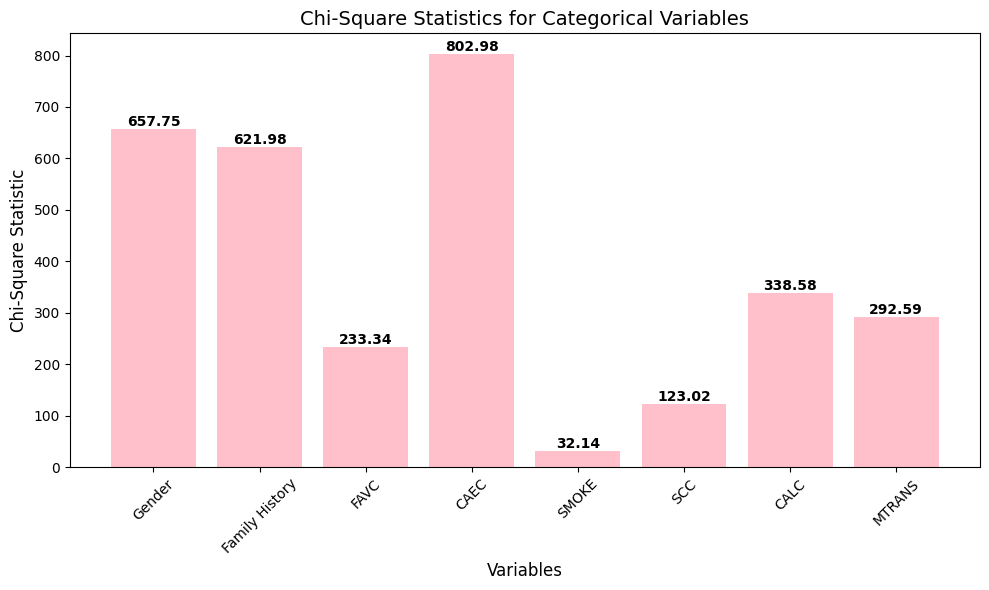

In [15]:
import matplotlib.pyplot as plt

# Data for visualization
variables = ['Gender', 'Family History', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
chi_square_stats = [657.75, 621.98, 233.34, 802.98, 32.14, 123.02, 338.58, 292.59]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(variables, chi_square_stats, color='pink')

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Chi-Square Statistics for Categorical Variables', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Chi-Square Statistic', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [16]:
# Descriptive statistics for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Descriptive Statistics for Numerical Variables:")
print(data[numerical_cols].describe())

Descriptive Statistics for Numerical Variables:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


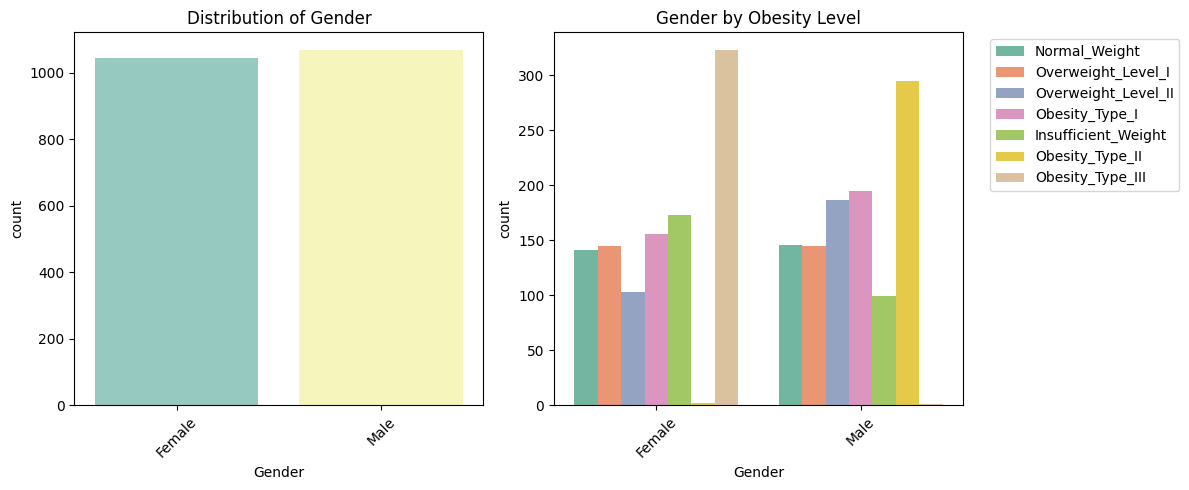

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


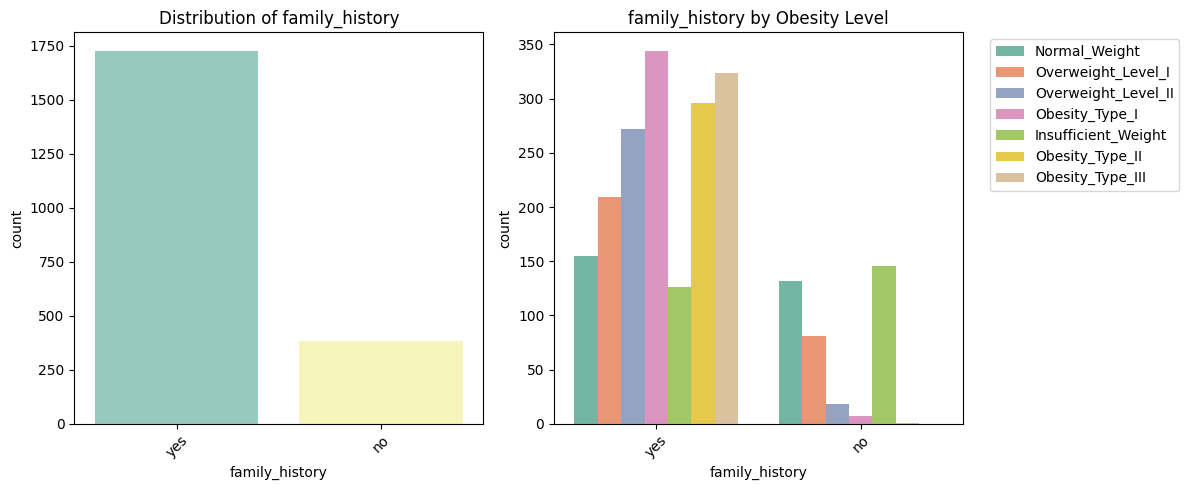

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


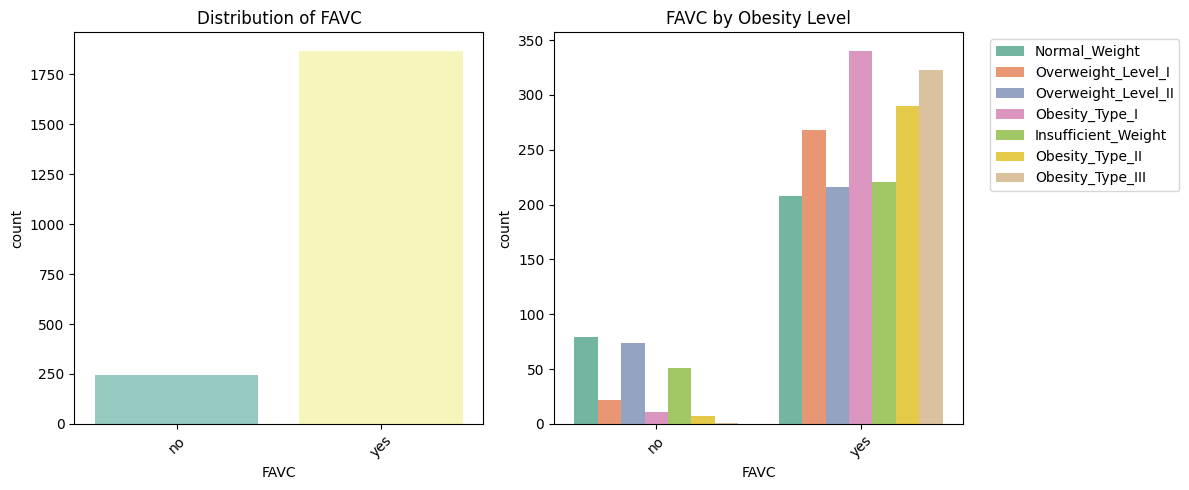

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


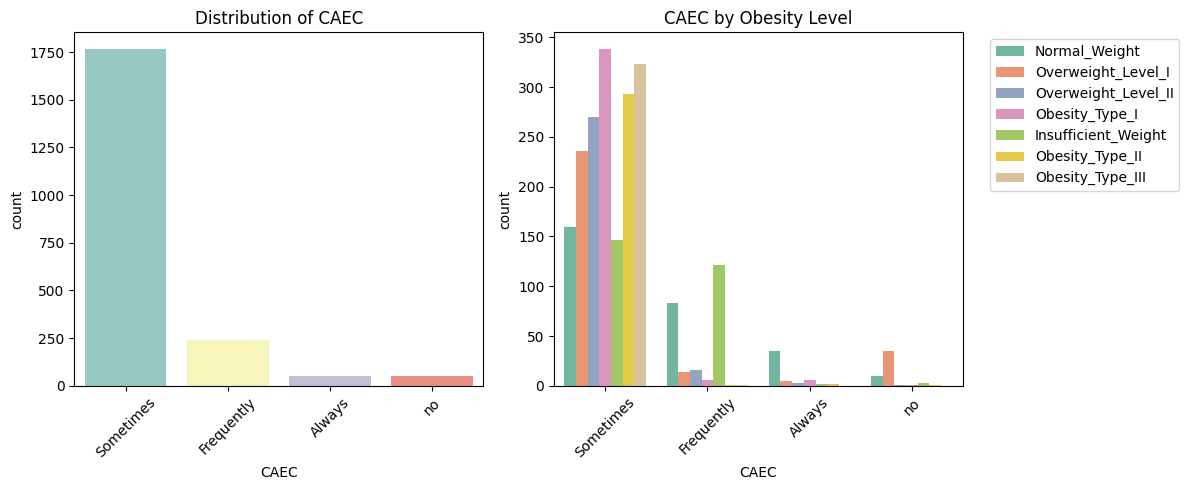

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


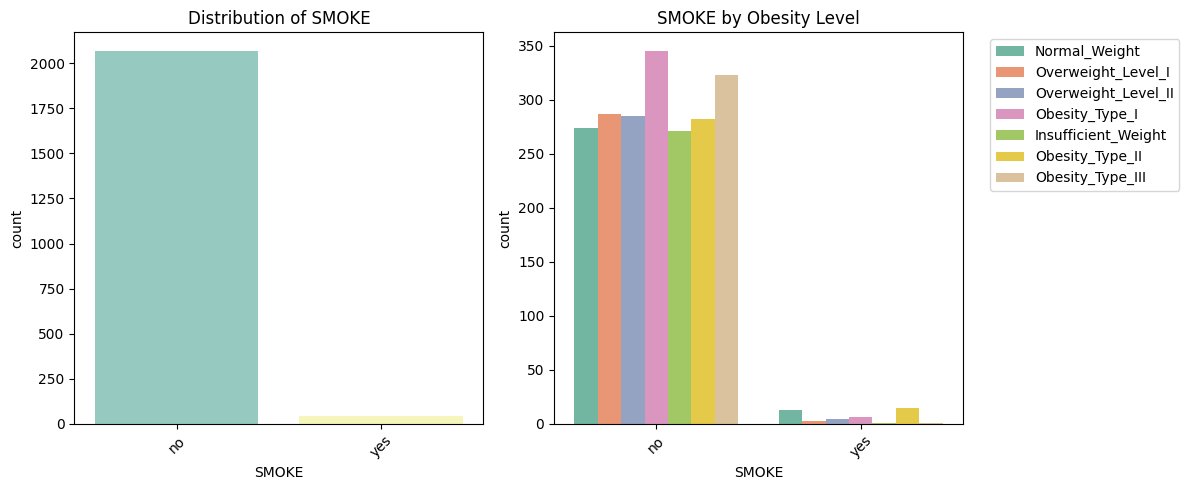

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


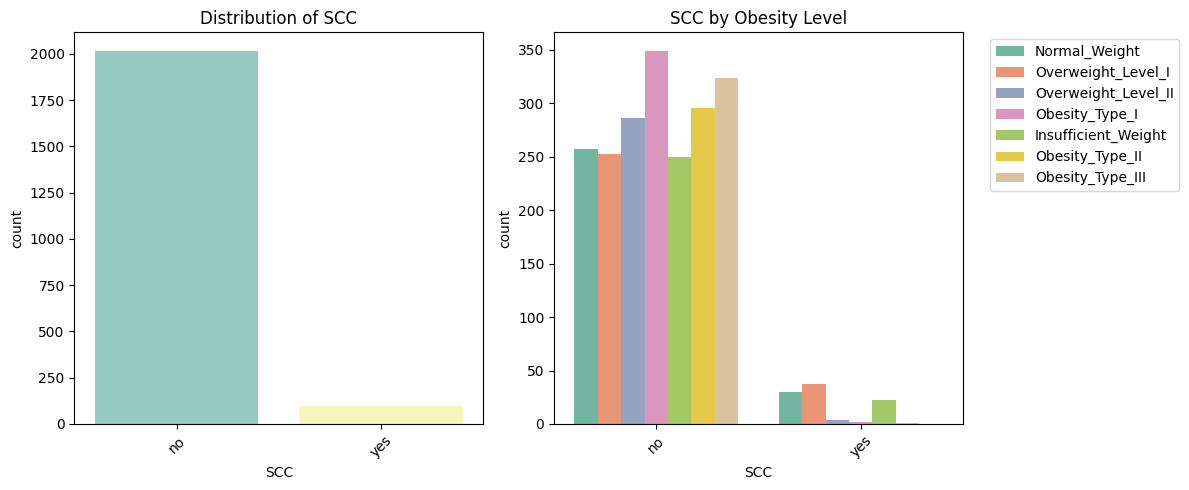

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


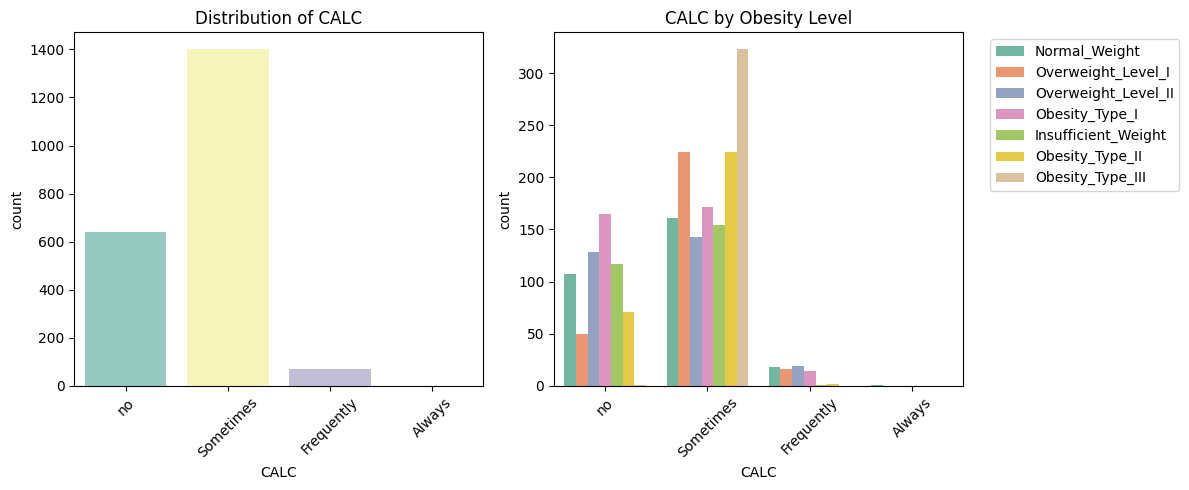

<ipython-input-17-b0b166870325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set3')


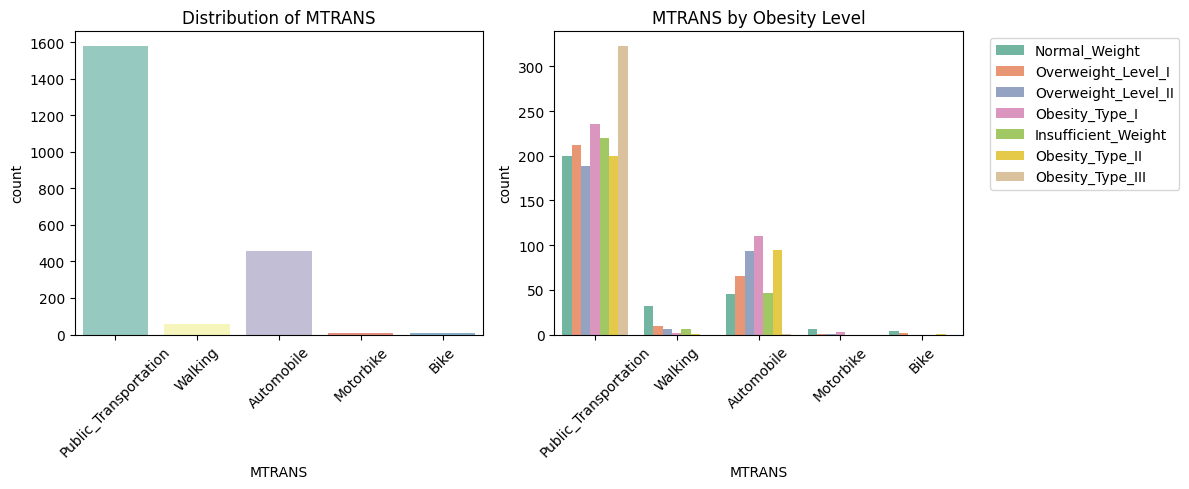

In [17]:
# Create a function for plotting categorical variable only , want to no know the relation of categorical towards target variable which is obesity level
def plot_categorical(column):
    plt.figure(figsize=(12, 5))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=column, palette='Set3')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column}')

    # Distribution by obesity level
    plt.subplot(1, 2, 2)
    sns.countplot(data=data, x=column, hue='Obesity', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{column} by Obesity Level')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot categorical variables
categorical_cols = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in categorical_cols:
    plot_categorical(col)

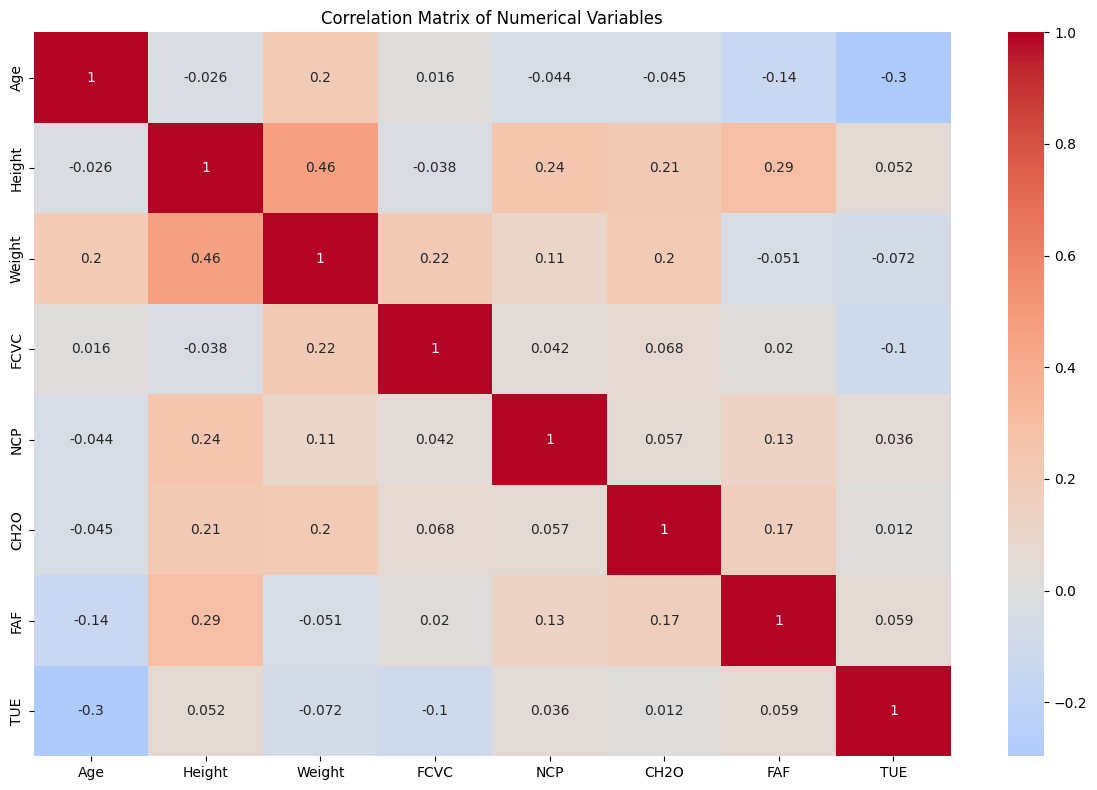

In [18]:
# Correlation analysis for numerical variables
correlation_matrix = data[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [19]:
# Calculate BMI and add new attribute from 17 became 18
data['BMI'] = data['Weight'] / (data['Height'] ** 2)
data.head()

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity        BMI  
0        Normal_Weight  24.386526  
1        Normal_Weight  24.238227  
2        Normal_Weight  23.765432  
3   Overweight_Level_I  26.851852  
4  Overweight_Level_II  28.342381

In [20]:
data.corr(method='pearson',numeric_only=True)

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   
BMI     0.244163  0.131785  0.934806  0.263651  0.039969  0.144200 -0.177537   

             TUE       BMI  
Age    -0.296931  0.244163  
Height  0.051912  0.131785  
Weight -0.071561  0.934806  
FCVC   -0.101135  0.263651  
NCP     0.036326  0.039969  
CH2O    0.011965  0.144200  
FAF     0.058562 -0.177537  
TUE     1.000000 -0.099720  
BMI    -0.099720  1.000000

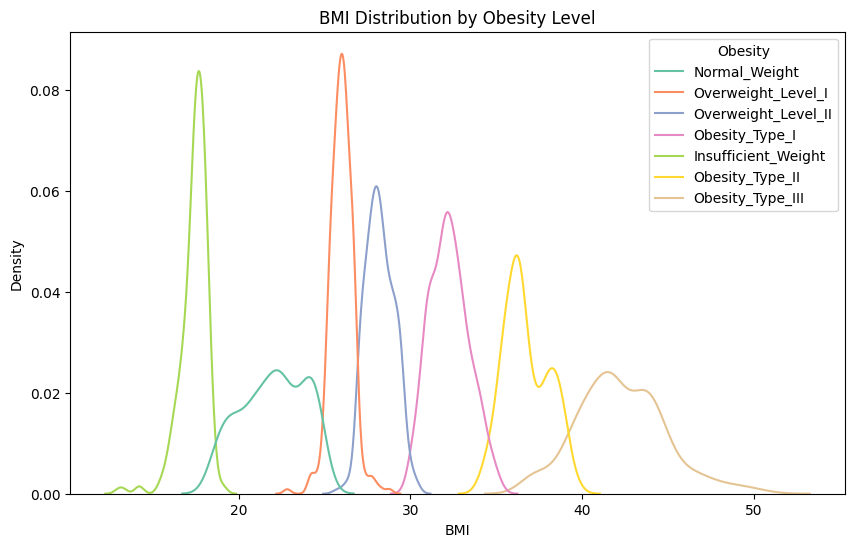

In [21]:
# Create BMI distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='BMI', hue='Obesity', palette='Set2')
plt.title('BMI Distribution by Obesity Level')
plt.show()

Label encoding is the process of converting labels into numeric form to make it machine readable. It is one of the most important parts in pre-processing of the dataset.

There were nine categorical features that were changed using the LabelEncoder() function. The features are gender, family_history, FAVC, CAEC, Smoke, SCC, CALC, MTRABS, and Obesity.


In [22]:
# Encode categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows of the encoded dataset
data_encoded.head()


Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     2      0   
3       1  27.0    1.80    87.0               0     0   3.0  3.0     2      0   
4       1  22.0    1.78    89.8               0     0   2.0  1.0     2      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity        BMI  
0   2.0    0  0.0  1.0     3       3        1  24.386526  
1   3.0    1  3.0  0.0     2       3        1  24.238227  
2   2.0    0  2.0  1.0     1       3        1  23.765432  
3   2.0    0  2.0  0.0     1       4        5  26.851852  
4   2.0    0  0.0  0.0     2       3        6  28.342381

In [23]:
# Assuming 'Obesity' is the encoded attribute and label_encoders is 'Obesity'
obesity_encoder = label_encoders['Obesity']

In [24]:
# Get the classes (original labels)
classes = obesity_encoder.classes_

# Create a dictionary for the mapping
label_mapping = dict(zip(range(len(classes)), classes))

# Print the mapping
print(label_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [25]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   int64  
 5   FAVC            2111 non-null   int64  
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   int64  
 9   SMOKE           2111 non-null   int64  
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   int64  
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   int64  
 15  MTRANS          2111 non-null   int64  
 16  Obesity         2111 non-null   int64  
 17  BMI             2111 non-null   f

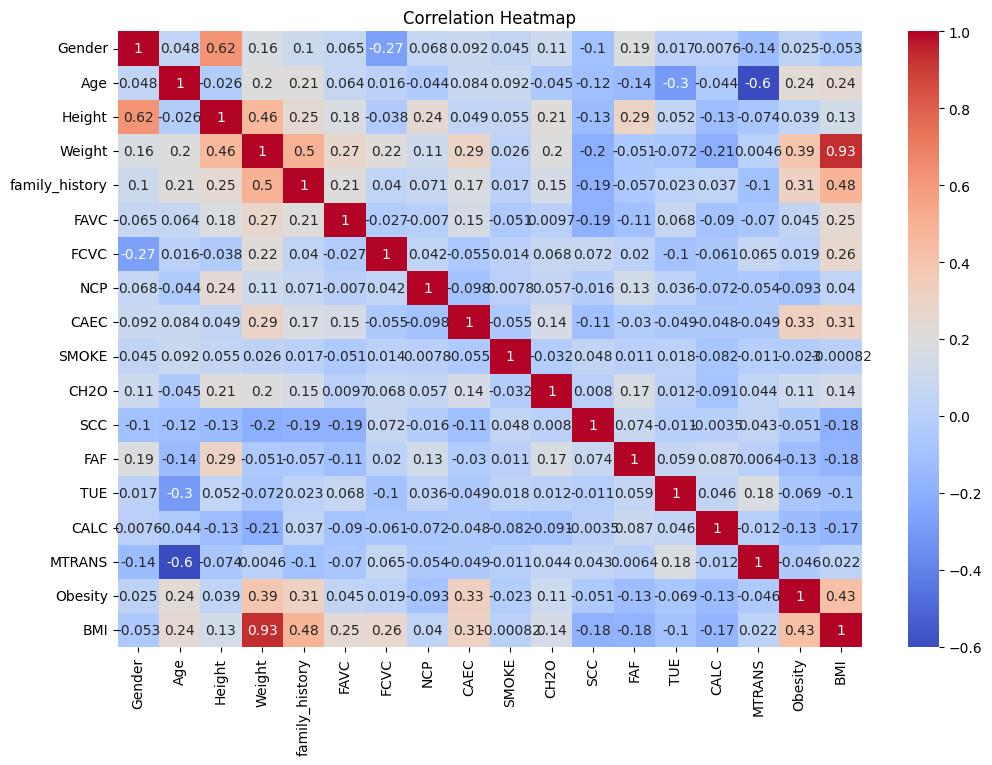

In [26]:
# Plot a heatmap of the correlation matrix
numeric_data = data_encoded.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

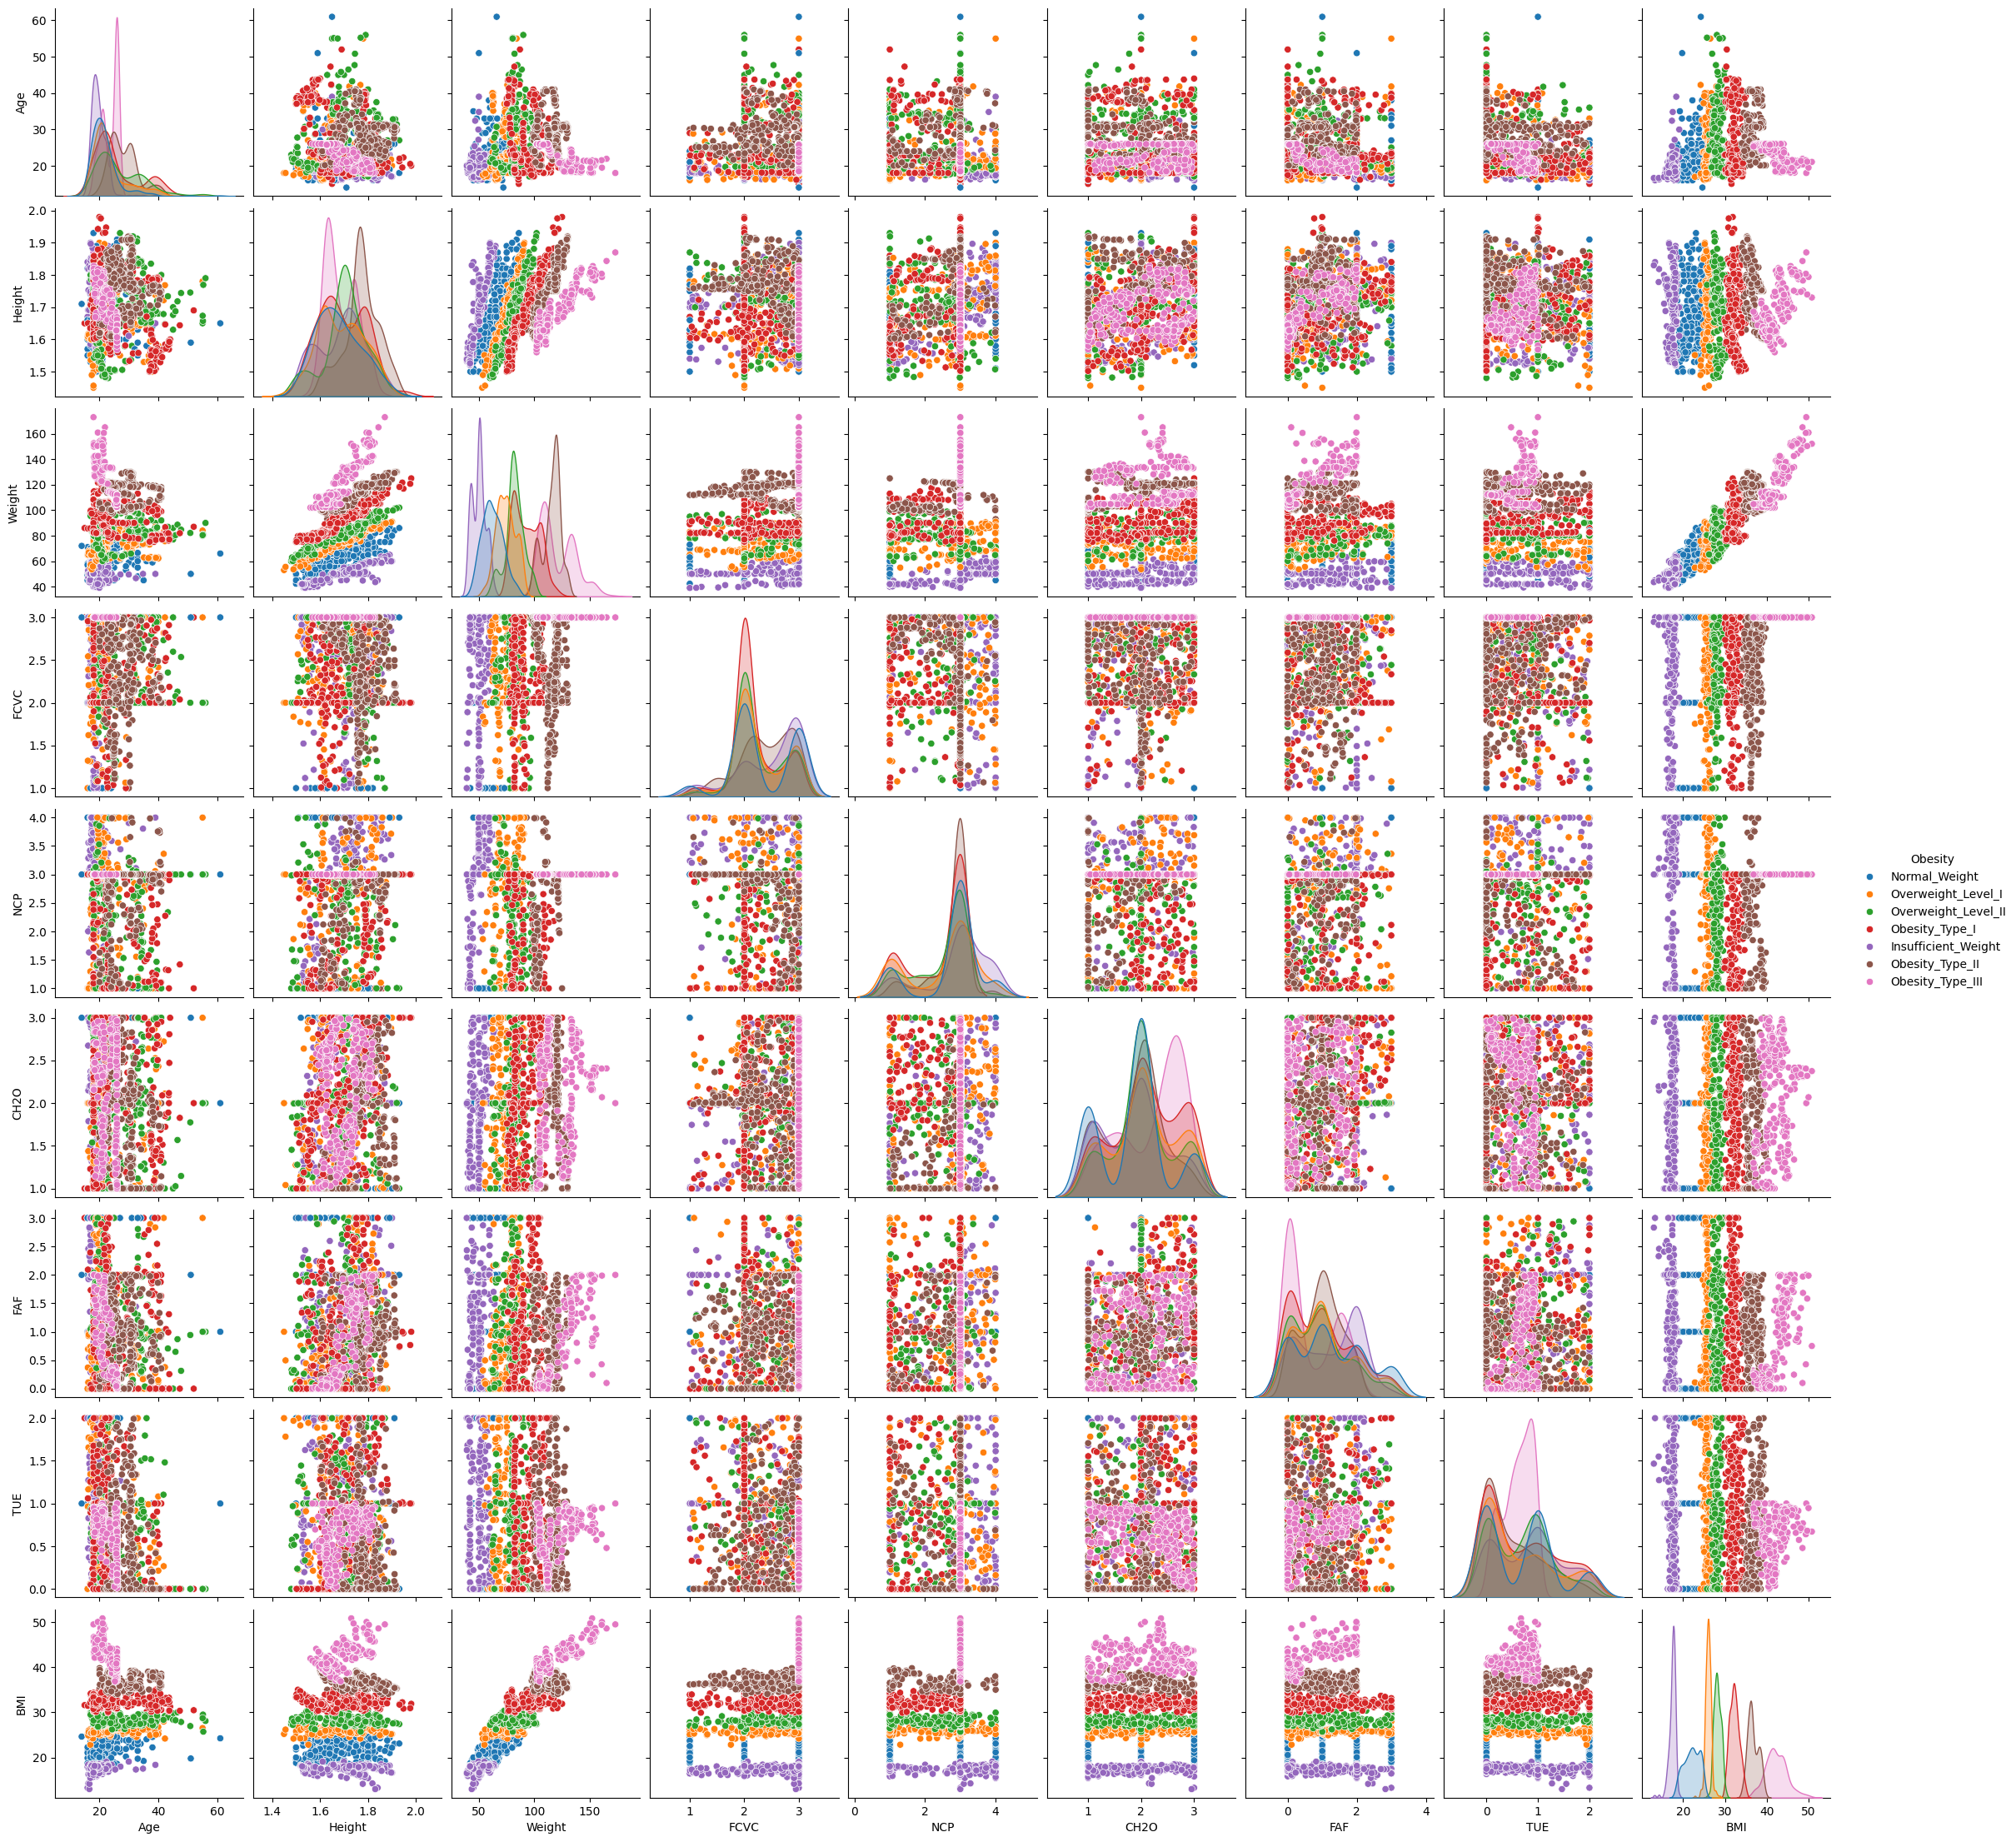

In [27]:
sns.pairplot(data, hue='Obesity')
plt.show()

# another method to visualization using scatter plot to show relationship between numerical features in dataset towards target variable which is obesity level

Seaborn is a Python library based on matplotlib. There are different types of plots like bar
plot, box plot and scatter plot. Scatter plot is very useful when we are analyzing the
relationship between 2 features on the x and y axis. In the seaborn library we have a pairplot
function which is very useful to scatter plot all the features at once instead of plotting them
individually.

# **4. Model Training and Evaluation**

***Machine Learning***

## 4.1 Split train & test dataset

In [28]:
# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [29]:
# Function to prepare data for modeling
def prepare_data(data_encoded):
    # Create a copy
    data_prep = data_encoded.copy()

    # Separate features and target
    X = data_prep.drop('Obesity', axis=1)
    y = data_prep['Obesity']

    # Split the data into training & test with a 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Prepare the data
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(data_encoded)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (1688, 17)
Testing set shape: (423, 17)


## 4.2 Model Building & Evaluation

In [30]:
# Function to evaluate models and store accuracy
model_accuracies = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model_accuracies[model_name] = accuracy  # Store accuracy for visualization

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)





Random Forest Results:
Accuracy: 0.9929
Cross-validation scores: [0.9852071  0.98816568 0.9852071  0.9851632  0.99109792]
Average CV score: 0.9870 (+/- 0.0047)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423


Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]

Logistic Regression Results:


Highest accuracy score is Random Forest(0.993). In addition, it also has very good score of Precision & CV

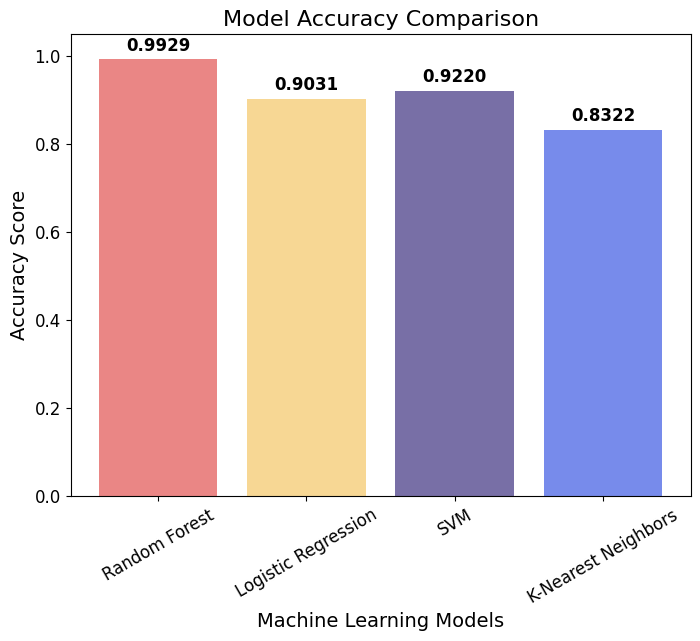

In [31]:
# Visualizing accuracy results
plt.figure(figsize= (8,6))  # Increased figure size for a bigger graph
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['#ea8685', '#f7d794', '#786fa6', '#778beb'])

plt.xlabel('Machine Learning Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 1.05)  # Increased y-axis limit slightly to keep labels within graph
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

# Adding accuracy values slightly below the top of the bars, still inside the graph space
for bar, (model, acc) in zip(bars, model_accuracies.items()):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.02,  # Positioned slightly below the top of the bar
             f'{acc:.4f}', ha='center', fontsize=12, fontweight='bold', color='black')

plt.show()


# **5. Hyperparameter Tuning**


In [32]:
#Applying Hyperparameter Tuning to all models that we have used
#Using parameter grids to identify optimum parameters for all models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'penalty': ['l2'],  # Change to 'l2' to be compatible with 'lbfgs'
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

In [33]:
# Tune hyperparameter for each models
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', error_score='raise') #
    # Fit the GridSearchCV object
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [35]:
#Applying the best parameters to evaluate all models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion)

# Create and evaluate models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42,max_depth= None,min_samples_split=2),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42,C=10, penalty='l2', solver='lbfgs'),
    'SVM': SVC(random_state=42,C=10, gamma='scale', kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3,metric='manhattan', weights='distance')
}

# Train and evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)


Random Forest Results:
Accuracy: 0.9929
Cross-validation scores: [0.98816568 0.99112426 0.98816568 0.98813056 0.99406528]
Average CV score: 0.9899 (+/- 0.0047)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423


Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]

Logistic Regression Results:


We had confirmed by manual calculations, the Average CV score displayed above is accurate. It represents the average of five cross-validation scores right above it.  

## 5.1 Performance Improvement Through Hyperparameter Tuning

**Conclusion:**

---

After applying hyperparameter tuning to all four Machine Learning models, we observe an improvement in accuracy for each model, as shown below:

**Random Forest**

Before: 0.9929 - After: **0.9929** (remain the same)



**Logistic Regression**

Before: 0.9031 - After: **0.9551** (+0.0520)



**SVM**

Before: 0.9220 - After: **0.9787** (+0.0567)



**K-Nearest Neighbors**

Before: 0.8322 - After: **0.9125** (+0.0803)





On top of that, we also noticed on the improvement in **average CV:**

**Random Forest**

Before: 0.9870 (+/- 0.0047)  - After:**0.9899** (+/- 0.0047)



**Logistic Regression**

Before: 0.8868 (+/- 0.0305) - After: **0.9390** (+/- 0.0232)


**SVM**

Before: 0.9046 (+/- 0.0357) - After: **0.9603** (+/- 0.0250)



**K-Nearest Neighbors**

Before: 0.8205 (+/- 0.0232) - After: **0.9094** (+/- 0.0361)


In term of Accuracy Score: Random Forest remain highest (0.993).However, there are slight increase in other model. For example, KKN increases from 0.832 to 0.913

<ipython-input-36-19bb1a1fd718>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='Set2')


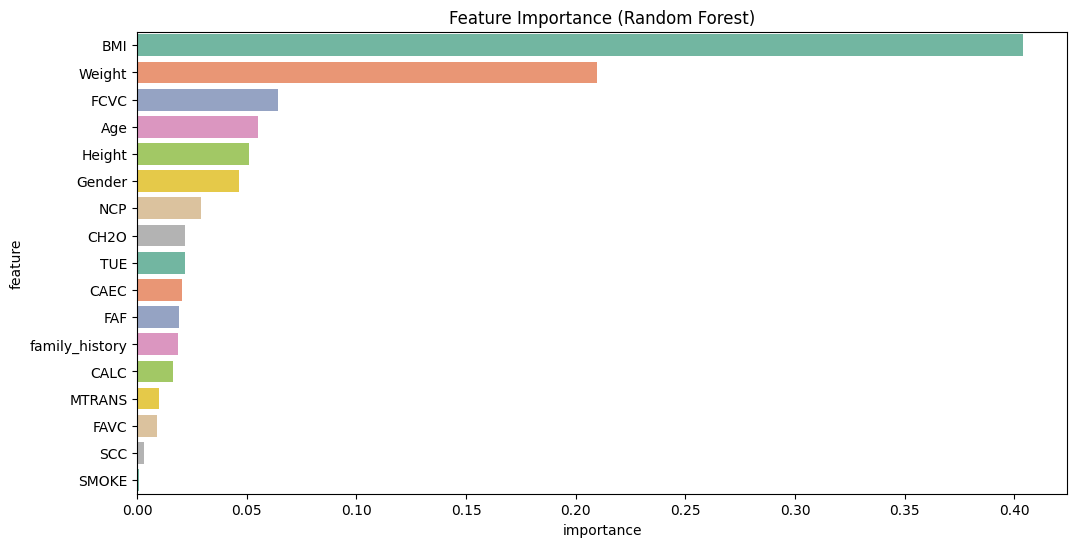

In [36]:
# To plot horizontalbar chart based on Feature Importance of Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': data.drop('Obesity', axis=1).columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
# To plot horizontalbar chart based on Feature Importance of Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': data.drop('Obesity', axis=1).columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='Set2')
plt.style.use('seaborn-v0_8-pastel')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [38]:
def predict_obesity(model, scaler, input_data):
    """
    Make predictions using the trained model

    Parameters:
    model: trained model
    scaler: fitted StandardScaler
    input_data: dictionary containing input features

    Returns:
    predicted obesity level
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Calculate BMI
    input_df['BMI'] = input_df['Weight'] / (input_df['Height'] ** 2)

    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = input_df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        input_df[col] = le.fit_transform(input_df[col])

    # Ensure columns match training data
    expected_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history',
                       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC',
                       'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']

    # Reorder columns to match training data
    input_df = input_df[expected_columns]


    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)

    return prediction[0]


In [39]:
sample_input = {
    'Gender': 'Male',
    'Age': 34.0,
    'Height': 1.65,
    'Weight': 83,
    'family_history': 'yes',
    'FAVC': 'no',
    'FCVC': 1.0,
    'NCP': 2.0,
    'CAEC': 'Sometimes',
    'SMOKE': 'yes',
    'CH2O': 2.0,
    'SCC': 'no',
    'FAF': 1.0,
    'TUE': 1.0,
    'CALC': 'no',
    'MTRANS': 'Public_Transportation'
}

# Make prediction using the Random Forest model
prediction = predict_obesity(models['Random Forest'], scaler, sample_input)
print(f"Predicted Obesity Level: {prediction}")

Predicted Obesity Level: 2


In [40]:
print(label_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


#Predicted Obesity Level:2 = Obesity Type 1